<a href="https://colab.research.google.com/github/sirikavali/Guvi/blob/main/precious_metel_price_forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Copper_data.csv to Copper_data (1).csv
Saving Gold_data.csv to Gold_data (1).csv
Saving Palladium_data.csv to Palladium_data (1).csv
Saving Platinum_data.csv to Platinum_data (1).csv


In [ ]:
data = pd.read_csv("Gold_data.csv")  # change name if needed
data.head()

,date,open,high,low,close,volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,0


In [ ]:
data = pd.read_csv("Gold_data.csv")  # your file name

# FIX HERE ↓↓↓
data['date'] = pd.to_datetime(data['date'])

data = data.sort_values('date')
data.set_index('date', inplace=True)

close_price = data[['close']]

In [ ]:
print(data.columns)

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


In [ ]:
last_1000_days = close_price[-1000:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(last_1000_days)

In [56]:
def create_dataset(data, time_step=365):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, 365)

In [57]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [58]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(365,1)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 365, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 365, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.fit(X, y, epochs=30, batch_size=32)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - loss: 0.0578
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - loss: 0.0091
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - loss: 0.0047
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step - loss: 0.0050
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - loss: 0.0049
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - loss: 0.0048
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - loss: 0.0045
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - loss: 0.0042
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 304ms/step - loss: 0.0049
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - loss: 0.0037
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - loss: 0.0036
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step - loss: 0.0034
Epoch 13/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - loss: 0.0036
Epoch 14/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 304ms/step - loss: 0.0038
Epoch 15/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - 

In [60]:
future_days = 365
last_365_days = scaled_data[-365:]

future_predictions = []

for i in range(future_days):
    input_data = last_365_days.reshape(1,365,1)
    next_day_price = model.predict(input_data)
    future_predictions.append(next_day_price[0,0])

    last_365_days = np.append(last_365_days[1:], next_day_price, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━

In [61]:
future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1,1)
)

In [62]:
last_date = close_price.index[-1]
future_dates = pd.date_range(start=last_date, periods=366, freq='D')[1:]

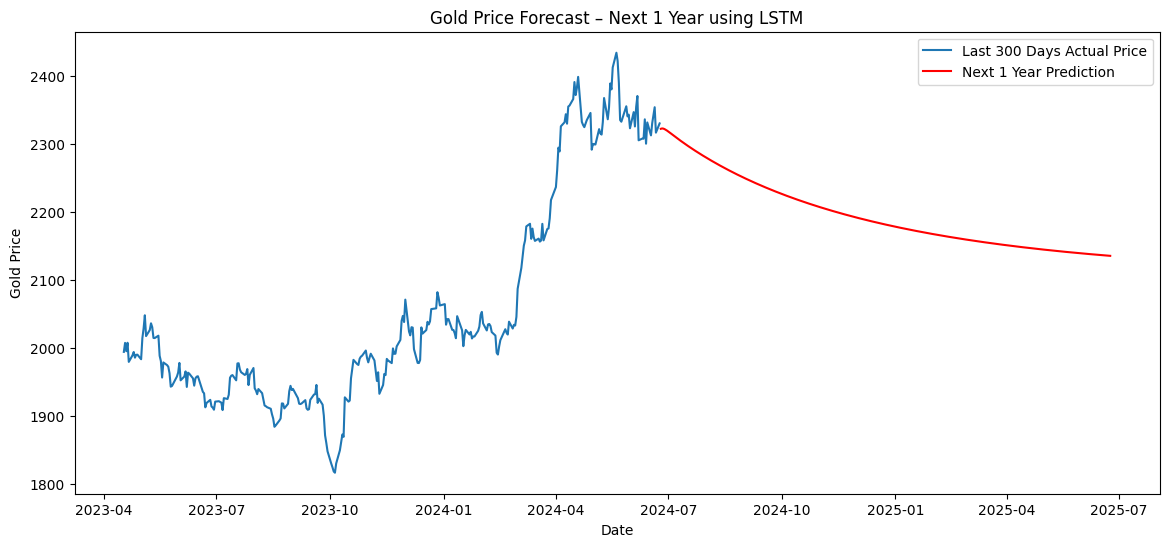

In [63]:
plt.figure(figsize=(14,6))
plt.plot(close_price[-300:], label="Last 300 Days Actual Price")
plt.plot(future_dates, future_predictions, color='red', label="Next 1 Year Prediction")
plt.title("Gold Price Forecast – Next 1 Year using LSTM")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [64]:
forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Gold Price": future_predictions.flatten()
})

forecast_df.head()

,Date,Predicted Gold Price
0,2024-06-25,2322.090332
1,2024-06-26,2322.600830
2,2024-06-27,2322.351562
3,2024-06-28,2321.627930
4,2024-06-29,2320.613525


from matplotlib import pyplot as plt
_df_14['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Predicted Gold Price'].plot(kind='hist', bins=20, title='Predicted Gold Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='index', y='Predicted Gold Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Predicted Gold Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Predicted Gold Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Predicted Gold Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Predicted Gold Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_21['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Predicted Gold Price'].plot(kind='line', figsize=(8, 4), title='Predicted Gold Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [66]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=forecast_df)

https://docs.google.com/spreadsheets/d/109LelHVMF2VDaBCpdFeCdXmTn9QppoOvdsZ1NYFflT0/edit#gid=0
